In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
destination_path = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/"
degree = pd.read_csv(destination_path+"degree.csv")


# Networks

- [Leiden](#leiden)
- [Louvain](#louvain)

### LEIDEN
<a id="leiden"/>

In [3]:
leiden = pd.read_csv(destination_path+'leiden.csv', lineterminator='\n')

In [5]:
leiden

,user,community
0,planetpaul65,0
1,isentinelli,0
2,Grace_1207,7
3,LidaSezOlbia,7
4,MarisaMinervini,1
...,...,...
216211,legatumori_to,101
216212,ExmoorOn,3
216213,Dado46544020,0
216214,BernardMalcom2,3


Le prime 10 community contengono il 91.47% degli utenti


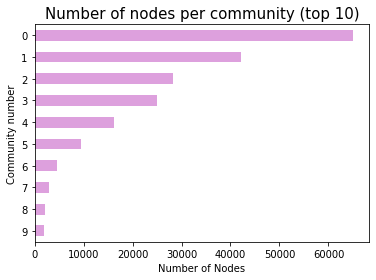

In [6]:
val = pd.Series(leiden["community"]).value_counts().sort_values(ascending=False)
total = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(leiden)*100,2)}% degli utenti")
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")
plt.show()

In [7]:
comm_0 = list(leiden[leiden["community"]==0]["user"])
comm_1 = list(leiden[leiden["community"]==1]["user"])
comm_2 = list(leiden[leiden["community"]==2]["user"])
comm_3 = list(leiden[leiden["community"]==3]["user"])
comm_4 = list(leiden[leiden["community"]==4]["user"])

In [8]:
cont = 0
value = 35
print("Community 0:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_0:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 1:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_1:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 2:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_2:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 3:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_3:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 4:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_4:
        print(item.user)
        cont = cont + 1

Community 0:
RobertoBurioni
CottarelliCPI
Cartabellotta
lucianocapone
Quirinale
GiacomoGorini
robersperanza
jacopo_iacoboni
GassmanGassmann
antonellaviol17
chetempochefa
gloquenzi
matteorenzi
Iperbole_
carloalberto
lercionotizie
riotta
AngeloBraga2
La_manina__
davcarretta
ricpuglisi
CarloCalenda
MedBunker
udogumpel
AugustoMinzolin
ilruttosovrano
claudiocerasa
pfmajorino
sbonaccini
ilpost
MMmarco0
OGiannino
lorepregliasco
Ruffino_Lorenzo
PierluigiBattis
-----------
Community 1:
lefrasidiosho
MicheleMazzell5
Zziagenio78
holyernia
bernaftaustin
Vivianabillo
Barbaramenteme
Tremenoventi
demonscamealive
felice_chi
sempreciro
yleniaindenial
LaBiaBi11
amaricord
cremino01
perchetendenza
raffaeleiovino
anikeatable
ffffjd
AllStarsLA
quinta
nelsottobosco
j_gufo
cesareporto
annidicera
bvrbharrys
_neardeath
sailor_snickers
BarbascuraX
LaGrevia
acetilcoglione
6dimattina_
Masse78
acciofocaccia
autoportante_
-----------
Community 2:
valy_s
pbecchi
intuslegens
MinervaMcGrani1
a_meluzzi
RadioSavana
Imola

In [9]:
merged = leiden.merge(degree, left_on="user", right_on="user", how="left")
df_for_gephi = merged[merged["degree"]>=10][["user"]]
df_for_gephi

,user
0,planetpaul65
1,isentinelli
2,Grace_1207
3,LidaSezOlbia
5,milio967
...,...
214843,SteveBucket7
214844,NiusMarco
215175,GuillaumeRozier
215459,SudRadio


In [10]:
rt = pd.read_parquet('C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Tweets/retweets.parquet',
                    engine = "fastparquet")
rt = rt[["user_screen_name", "rt_user_screen_name"]]
rt

,user_screen_name,rt_user_screen_name
0,planetpaul65,isentinelli
1,Grace_1207,LidaSezOlbia
2,MarisaMinervini,milio967
3,arual812,Annalisa3073
4,pvsassone,FabbioSabatini
...,...,...
2414491,Obsolete_LG,RobertaSR7
2414492,Ileana0406,MediasetTgcom24
2414493,CiaoGrosso,borghi_claudio
2414494,lucabattanta,valy_s


In [11]:
merge_prova = rt.merge(df_for_gephi, left_on="user_screen_name", right_on="user", how="left")
merge_prova2 = merge_prova.merge(df_for_gephi, left_on="rt_user_screen_name", right_on="user", how="left")
merge_prova2

,user_screen_name,rt_user_screen_name,user_x,user_y
0,planetpaul65,isentinelli,planetpaul65,isentinelli
1,Grace_1207,LidaSezOlbia,Grace_1207,LidaSezOlbia
2,MarisaMinervini,milio967,NaN,milio967
3,arual812,Annalisa3073,arual812,Annalisa3073
4,pvsassone,FabbioSabatini,pvsassone,FabbioSabatini
...,...,...,...,...
2414491,Obsolete_LG,RobertaSR7,Obsolete_LG,RobertaSR7
2414492,Ileana0406,MediasetTgcom24,Ileana0406,MediasetTgcom24
2414493,CiaoGrosso,borghi_claudio,CiaoGrosso,borghi_claudio
2414494,lucabattanta,valy_s,lucabattanta,valy_s


In [12]:
final = merge_prova2[merge_prova2["user_x"].notna() & merge_prova2["user_y"].notna()][["user_screen_name", "rt_user_screen_name"]]

In [13]:
final

,user_screen_name,rt_user_screen_name
0,planetpaul65,isentinelli
1,Grace_1207,LidaSezOlbia
3,arual812,Annalisa3073
4,pvsassone,FabbioSabatini
7,BrunoCervesi,AnnaLaurapz
...,...,...
2414490,Obsolete_LG,borghi_claudio
2414491,Obsolete_LG,RobertaSR7
2414492,Ileana0406,MediasetTgcom24
2414493,CiaoGrosso,borghi_claudio


In [61]:
x = list(set(final["user_screen_name"]))
y = list(set(final["rt_user_screen_name"]))
x.extend(y)
list(set(x))
len(x)

48533

In [63]:
pd.DataFrame(x, columns=["name"]).to_csv("C:/Users/gianl/Desktop/names.csv", line_terminator="\n", index=False, encoding="utf-8")

In [64]:
final.to_csv("C:/Users/gianl/Desktop/user_rtuser.csv", line_terminator="\n", index=False, encoding="utf-8")

In [66]:
leiden

,user,community
0,planetpaul65,0
1,isentinelli,0
2,Grace_1207,7
3,LidaSezOlbia,7
4,MarisaMinervini,1
...,...,...
216211,legatumori_to,101
216212,ExmoorOn,3
216213,Dado46544020,0
216214,BernardMalcom2,3


In [14]:
merge_prova = final.merge(leiden, left_on="user_screen_name", right_on="user", how="left")
merge_prova2 = merge_prova.merge(leiden, left_on="rt_user_screen_name", right_on="user", how="left")


In [16]:
lst = [0,1,2,3,4]
merge_prova2[merge_prova2["community_x"].isin(lst) & merge_prova2["community_y"].isin(lst)]

,user_screen_name,rt_user_screen_name,user_x,community_x,user_y,community_y
0,planetpaul65,isentinelli,planetpaul65,0,isentinelli,0
2,arual812,Annalisa3073,arual812,0,Annalisa3073,1
3,pvsassone,FabbioSabatini,pvsassone,0,FabbioSabatini,0
4,BrunoCervesi,AnnaLaurapz,BrunoCervesi,4,AnnaLaurapz,0
6,SalaLettura,MollyBloom82,SalaLettura,1,MollyBloom82,1
...,...,...,...,...,...,...
1971858,Obsolete_LG,borghi_claudio,Obsolete_LG,2,borghi_claudio,2
1971859,Obsolete_LG,RobertaSR7,Obsolete_LG,2,RobertaSR7,2
1971860,Ileana0406,MediasetTgcom24,Ileana0406,2,MediasetTgcom24,3
1971861,CiaoGrosso,borghi_claudio,CiaoGrosso,2,borghi_claudio,2


In [32]:
final2 = merge_prova2[merge_prova2["community_x"].isin(lst) & merge_prova2["community_y"].isin(lst)][["user_screen_name", "rt_user_screen_name"]]
x = list(set(final2["user_screen_name"]))
y = list(set(final2["rt_user_screen_name"]))
x.extend(y)
x = list(set(x))
len(x)

30089

In [19]:
m2[m2["community"].notna()]

,name,community
0,spinassunta,2
1,rra_1978,0
2,_glam_amour_,0
3,massimesso,0
4,FriulLibar,2
...,...,...
46105,EzioSavasta,0
46106,FGer28,2
46107,privatebusiness,2
46108,Lore_Colt,0


In [34]:
names2 = pd.DataFrame(x, columns=["name"])
m2 = names2.merge(leiden, left_on="name", right_on="user", how="left")
m2 = m2[["name", "community"]]
m2

,name,community
0,spinassunta,2
1,rra_1978,0
2,_glam_amour_,0
3,massimesso,0
4,FriulLibar,2
...,...,...
30084,LanzoIgor,0
30085,MariangelaErcu3,2
30086,Efesto51,2
30087,patriziasaggia,0


In [35]:
m2.to_csv("C:/Users/gianl/Desktop/names_2.csv", line_terminator="\n", index=False, encoding="utf-8")

In [76]:
m2.to_csv("C:/Users/gianl/Desktop/names_2.csv", line_terminator="\n", index=False, encoding="utf-8")
final2.to_csv("C:/Users/gianl/Desktop/user_rtuser_2.csv", line_terminator="\n", index=False, encoding="utf-8")

In [36]:
lst_Id = []
lst_Label = []
lst_Community = []
cont = 0
for i in m2.itertuples():
    lst_Id.append(cont)
    cont = cont + 1
    lst_Label.append(i.name)
    lst_Community.append(i.community)
    
df_nodes = pd.DataFrame(list(zip(lst_Id, lst_Label, lst_Community)), columns=["Id", "Label", "Community"])
df_nodes

,Id,Label,Community
0,0,spinassunta,2
1,1,rra_1978,0
2,2,_glam_amour_,0
3,3,massimesso,0
4,4,FriulLibar,2
...,...,...,...
30084,30084,LanzoIgor,0
30085,30085,MariangelaErcu3,2
30086,30086,Efesto51,2
30087,30087,patriziasaggia,0


In [37]:
mm = final2.merge(df_nodes, left_on="user_screen_name", right_on="Label", how="left")
mm = mm.merge(df_nodes, left_on="rt_user_screen_name", right_on="Label", how="left")
mm

,user_screen_name,rt_user_screen_name,Id_x,Label_x,Community_x,Id_y,Label_y,Community_y
0,planetpaul65,isentinelli,883,planetpaul65,0,13668,isentinelli,0
1,arual812,Annalisa3073,4180,arual812,0,25299,Annalisa3073,1
2,pvsassone,FabbioSabatini,9606,pvsassone,0,28977,FabbioSabatini,0
3,BrunoCervesi,AnnaLaurapz,12726,BrunoCervesi,4,14840,AnnaLaurapz,0
4,SalaLettura,MollyBloom82,16143,SalaLettura,1,27386,MollyBloom82,1
...,...,...,...,...,...,...,...,...
1911020,Obsolete_LG,borghi_claudio,28338,Obsolete_LG,2,16531,borghi_claudio,2
1911021,Obsolete_LG,RobertaSR7,28338,Obsolete_LG,2,497,RobertaSR7,2
1911022,Ileana0406,MediasetTgcom24,9955,Ileana0406,2,27239,MediasetTgcom24,3
1911023,CiaoGrosso,borghi_claudio,15845,CiaoGrosso,2,16531,borghi_claudio,2


In [39]:
mm = mm[["Id_x", "Id_y", "Label_x", "Label_y"]]
mm.rename(columns={'Id_x': 'Source', 'Id_y': 'Target', 'Label_x': 'From', 'Label_y': 'To' }, inplace=True)
mm

,Source,Target,From,To
0,883,13668,planetpaul65,isentinelli
1,4180,25299,arual812,Annalisa3073
2,9606,28977,pvsassone,FabbioSabatini
3,12726,14840,BrunoCervesi,AnnaLaurapz
4,16143,27386,SalaLettura,MollyBloom82
...,...,...,...,...
1911020,28338,16531,Obsolete_LG,borghi_claudio
1911021,28338,497,Obsolete_LG,RobertaSR7
1911022,9955,27239,Ileana0406,MediasetTgcom24
1911023,15845,16531,CiaoGrosso,borghi_claudio


In [40]:
df_nodes.to_csv("C:/Users/gianl/Desktop/names_3.csv", line_terminator="\n", index=False, encoding="utf-8")
mm.to_csv("C:/Users/gianl/Desktop/user_rtuser_3.csv", line_terminator="\n", index=False, encoding="utf-8")

# LOUVAIN
<a id="louvain"/>

In [6]:
louvain = pd.read_csv(destination_path + "louvain.csv")
louvain

,name,community
0,planetpaul65,0
1,isentinelli,0
2,Grace_1207,1
3,LidaSezOlbia,1
4,MarisaMinervini,2
...,...,...
216211,legatumori_to,1832
216212,ExmoorOn,3
216213,Dado46544020,0
216214,BernardMalcom2,3


Le prime 5 community contengono il 82.29% degli utenti


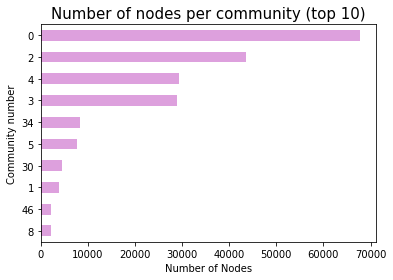

In [6]:
val = pd.Series(louvain["community"]).value_counts().sort_values(ascending=False)
total = 0
for i in val[:5]:
    total = total + i
print(f"Le prime 5 community contengono il {round(total/len(louvain)*100,2)}% degli utenti")
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")
plt.show()

In [9]:
comm_0 = list(louvain[louvain["community"]==0]["name"])
comm_2 = list(louvain[louvain["community"]==2]["name"])
comm_4 = list(louvain[louvain["community"]==4]["name"])
comm_3 = list(louvain[louvain["community"]==3]["name"])

In [11]:
degree = pd.read_csv(destination_path+"degree.csv")
cont = 0
value = 35
print("Community 0:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_0:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 2:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_2:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 4:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_4:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 3:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_3:
        print(item.user)
        cont = cont + 1


Community 0:
RobertoBurioni
CottarelliCPI
Cartabellotta
lucianocapone
Quirinale
GiacomoGorini
robersperanza
jacopo_iacoboni
GassmanGassmann
HuffPostItalia
antonellaviol17
chetempochefa
matteorenzi
Iperbole_
carloalberto
riotta
AngeloBraga2
La_manina__
davcarretta
ricpuglisi
CarloCalenda
MedBunker
udogumpel
AugustoMinzolin
ilruttosovrano
claudiocerasa
pfmajorino
sbonaccini
ilpost
MMmarco0
OGiannino
lorepregliasco
Ruffino_Lorenzo
PierluigiBattis
manginobrioches
-----------
Community 2:
MicheleMazzell5
gloquenzi
lercionotizie
Zziagenio78
holyernia
bernaftaustin
Dio
Vivianabillo
Barbaramenteme
Tremenoventi
demonscamealive
felice_chi
sempreciro
yleniaindenial
LaBiaBi11
amaricord
cremino01
perchetendenza
raffaeleiovino
anikeatable
rtl1025
ffffjd
AllStarsLA
quinta
nelsottobosco
j_gufo
cesareporto
annidicera
bvrbharrys
_neardeath
sailor_snickers
BarbascuraX
LaGrevia
acetilcoglione
6dimattina_
-----------
Community 4:
valy_s
pbecchi
intuslegens
MinervaMcGrani1
a_meluzzi
RadioSavana
ImolaOggi
Ba

In [9]:
merged = louvain.merge(degree, left_on="name", right_on="user", how="left")
df_for_gephi = merged[merged["degree"]>=10][["user"]]
df_for_gephi

,user
0,planetpaul65
1,isentinelli
2,Grace_1207
3,LidaSezOlbia
5,milio967
...,...
214843,SteveBucket7
214844,NiusMarco
215175,GuillaumeRozier
215459,SudRadio


In [11]:
rt = pd.read_parquet('C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Tweets/retweets.parquet',
                    engine = "fastparquet")
rt = rt[["user_screen_name", "rt_user_screen_name"]]
merge_prova = rt.merge(df_for_gephi, left_on="user_screen_name", right_on="user", how="left")
merge_prova2 = merge_prova.merge(df_for_gephi, left_on="rt_user_screen_name", right_on="user", how="left")
merge_prova2

,user_screen_name,rt_user_screen_name,user_x,user_y
0,planetpaul65,isentinelli,planetpaul65,isentinelli
1,Grace_1207,LidaSezOlbia,Grace_1207,LidaSezOlbia
2,MarisaMinervini,milio967,NaN,milio967
3,arual812,Annalisa3073,arual812,Annalisa3073
4,pvsassone,FabbioSabatini,pvsassone,FabbioSabatini
...,...,...,...,...
2414491,Obsolete_LG,RobertaSR7,Obsolete_LG,RobertaSR7
2414492,Ileana0406,MediasetTgcom24,Ileana0406,MediasetTgcom24
2414493,CiaoGrosso,borghi_claudio,CiaoGrosso,borghi_claudio
2414494,lucabattanta,valy_s,lucabattanta,valy_s


In [15]:
final = merge_prova2[merge_prova2["user_x"].notna() & merge_prova2["user_y"].notna()][["user_screen_name", "rt_user_screen_name"]]
merge_prova = final.merge(louvain, left_on="user_screen_name", right_on="name", how="left")
merge_prova2 = merge_prova.merge(louvain, left_on="rt_user_screen_name", right_on="name", how="left")
lst = [0,2,4,3]
merge_prova2[merge_prova2["community_x"].isin(lst) & merge_prova2["community_y"].isin(lst)]

,user_screen_name,rt_user_screen_name,name_x,community_x,name_y,community_y
0,planetpaul65,isentinelli,planetpaul65,0,isentinelli,0
2,arual812,Annalisa3073,arual812,0,Annalisa3073,2
3,pvsassone,FabbioSabatini,pvsassone,0,FabbioSabatini,0
4,BrunoCervesi,AnnaLaurapz,BrunoCervesi,0,AnnaLaurapz,0
7,MilettoMaria,LottiLuca,MilettoMaria,0,LottiLuca,0
...,...,...,...,...,...,...
1971858,Obsolete_LG,borghi_claudio,Obsolete_LG,4,borghi_claudio,4
1971859,Obsolete_LG,RobertaSR7,Obsolete_LG,4,RobertaSR7,4
1971860,Ileana0406,MediasetTgcom24,Ileana0406,4,MediasetTgcom24,3
1971861,CiaoGrosso,borghi_claudio,CiaoGrosso,4,borghi_claudio,4


In [17]:
final2 = merge_prova2[merge_prova2["community_x"].isin(lst) & merge_prova2["community_y"].isin(lst)][["user_screen_name", "rt_user_screen_name"]]
x = list(set(final2["user_screen_name"]))
y = list(set(final2["rt_user_screen_name"]))
x.extend(y)
x = list(set(x))
len(x)
names2 = pd.DataFrame(x, columns=["name"])
m2 = names2.merge(louvain, left_on="name", right_on="name", how="left")
m2 = m2[["name", "community"]]
m2

,name,community
0,80Ivi,0
1,b_elide,0
2,Marialuisalupi,0
3,HDEddie75,4
4,intuslegens,4
...,...,...
29774,Ferdi__Romano,4
29775,1giornodapecora,0
29776,flaviafratello,0
29777,bruxebanner,2


In [18]:
lst_Id = []
lst_Label = []
lst_Community = []
cont = 0
for i in m2.itertuples():
    lst_Id.append(cont)
    cont = cont + 1
    lst_Label.append(i.name)
    lst_Community.append(i.community)
    
df_nodes = pd.DataFrame(list(zip(lst_Id, lst_Label, lst_Community)), columns=["Id", "Label", "Community"])
df_nodes

,Id,Label,Community
0,0,80Ivi,0
1,1,b_elide,0
2,2,Marialuisalupi,0
3,3,HDEddie75,4
4,4,intuslegens,4
...,...,...,...
29774,29774,Ferdi__Romano,4
29775,29775,1giornodapecora,0
29776,29776,flaviafratello,0
29777,29777,bruxebanner,2


In [19]:
mm = final2.merge(df_nodes, left_on="user_screen_name", right_on="Label", how="left")
mm = mm.merge(df_nodes, left_on="rt_user_screen_name", right_on="Label", how="left")
mm

,user_screen_name,rt_user_screen_name,Id_x,Label_x,Community_x,Id_y,Label_y,Community_y
0,planetpaul65,isentinelli,14530,planetpaul65,0,2960,isentinelli,0
1,arual812,Annalisa3073,18111,arual812,0,19891,Annalisa3073,2
2,pvsassone,FabbioSabatini,22432,pvsassone,0,8565,FabbioSabatini,0
3,BrunoCervesi,AnnaLaurapz,14639,BrunoCervesi,0,16321,AnnaLaurapz,0
4,MilettoMaria,LottiLuca,19294,MilettoMaria,0,7457,LottiLuca,0
...,...,...,...,...,...,...,...,...
1899040,Obsolete_LG,borghi_claudio,10643,Obsolete_LG,4,7208,borghi_claudio,4
1899041,Obsolete_LG,RobertaSR7,10643,Obsolete_LG,4,9588,RobertaSR7,4
1899042,Ileana0406,MediasetTgcom24,20807,Ileana0406,4,14457,MediasetTgcom24,3
1899043,CiaoGrosso,borghi_claudio,14447,CiaoGrosso,4,7208,borghi_claudio,4


In [20]:
mm = mm[["Id_x", "Id_y", "Label_x", "Label_y"]]
mm.rename(columns={'Id_x': 'Source', 'Id_y': 'Target', 'Label_x': 'From', 'Label_y': 'To' }, inplace=True)
mm

<ipython-input-20-93650886b2a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm.rename(columns={'Id_x': 'Source', 'Id_y': 'Target', 'Label_x': 'From', 'Label_y': 'To' }, inplace=True)


,Source,Target,From,To
0,14530,2960,planetpaul65,isentinelli
1,18111,19891,arual812,Annalisa3073
2,22432,8565,pvsassone,FabbioSabatini
3,14639,16321,BrunoCervesi,AnnaLaurapz
4,19294,7457,MilettoMaria,LottiLuca
...,...,...,...,...
1899040,10643,7208,Obsolete_LG,borghi_claudio
1899041,10643,9588,Obsolete_LG,RobertaSR7
1899042,20807,14457,Ileana0406,MediasetTgcom24
1899043,14447,7208,CiaoGrosso,borghi_claudio


In [21]:
df_nodes.to_csv("C:/Users/gianl/Desktop/names_louvain.csv", line_terminator="\n", index=False, encoding="utf-8")
mm.to_csv("C:/Users/gianl/Desktop/user_rtuser_louvain.csv", line_terminator="\n", index=False, encoding="utf-8")